<a href="https://colab.research.google.com/github/vasanthk99/Data_Science_Project/blob/main/supermarket_sales_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas, numpy
import os
from IPython.display import display, HTML
import datetime, calendar
from plotly import express
import plotly.graph_objects as go
import matplotlib.pyplot as slspl, seaborn as sestk
from sklearn import metrics, decomposition, utils, model_selection, pipeline,preprocessing, feature_selection
from sklearn import ensemble, tree, svm, neural_network, linear_model

import pickle

In [2]:
SlsDf=pandas.read_csv("/content/Amazon Sale Report.csv")
SlsDf.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
def ClnCov(sls):
    print("==========================================")
    print("      Data Infomation")
    print("==========================================")
    print(sls.info())
    print("===================================================")
    print("Missing Values Before Cleaning")
    print("===================================================")
    print(sls.isnull().sum())
    smcov=sum(sls.isnull().sum())
    if smcov>0:
        covob=sls.dtypes[sls.dtypes=='object'].index.tolist()
        covnm=sls.dtypes[sls.dtypes!='object'].index.tolist()
        if sum(sls.isna().sum())!=0:
            for x in covob:
                sls[x]=sls[x].fillna(sls[x].mode()[0])
            for y in covnm:
                sls[y]=sls[y].fillna(sls[y].mean())
        print("===================================================")
        print("      Missing Values (After Cleaning)")
        print("===================================================")
        print(sls.isnull().sum())
    else:
        print("===================================================")
        print("      Data has no Missing Values ")
        print("===================================================")
    return sls
SlsDfMS=ClnCov(SlsDf)

      Data Infomation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount      

In [4]:
def CovDates(sls):
    sldf="Date"
    slmn=[]
    for x in range(1,13):
        slmn.append(calendar.month_name[x])
    dts_sls=sls[sldf].tolist()
    slmn,slmn1=[],[]
    dates_sls=[]
    year_sls=[]
    idx_months=[]
    new_features=['Year','Days','Month(Num)','Months']
    for d in dts_sls:
        spl=d.split("-")
        year_sls.append(int("20"+spl[2]))
        slmn.append(int(spl[0]))
        slmn1.append(calendar.month_name[int(spl[0])])
        dates_sls.append(int(spl[1]))
    for m in slmn:
        idx_months.append(slmn[m-1])
    try:
        sls.insert(1,new_features[0],numpy.array(year_sls,str))
        sls.insert(2,new_features[1],dates_sls)
        sls.insert(3,new_features[2],idx_months)
        sls.insert(4,new_features[3],slmn1)
    except:
        pass
    #sls=sls.drop('Date',axis=1)
    return sls
SlsDfNew=CovDates(SlsDfMS)
SlsDfNew.head()

,index,Year,Days,Month(Num),Months,Order ID,Date,Status,Fulfilment,Sales Channel,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,2022,30,4,April,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
1,1,2022,30,4,April,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
2,2,2022,30,4,April,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship,False
3,3,2022,30,4,April,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
4,4,2022,30,4,April,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False


EDA


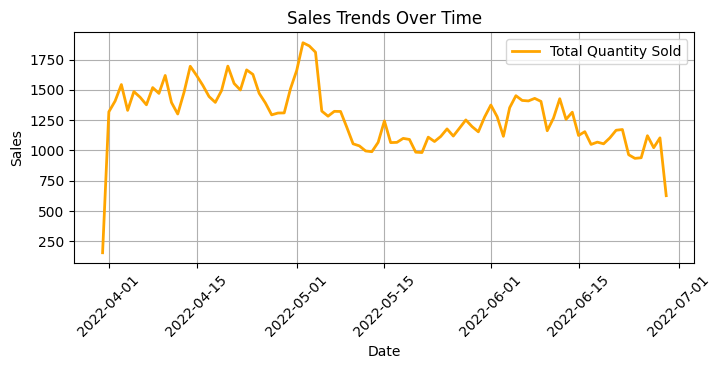

In [5]:
SlsDfNew['Date'] = pandas.to_datetime(SlsDfNew['Date'])
daily_sales = SlsDfNew.groupby('Date').agg(total_qty=('Qty', 'sum'), total_amount=('Amount', 'sum')).reset_index()
slspl.figure(figsize=(8, 3))
sestk.lineplot(data=daily_sales, x='Date', y='total_qty', label='Total Quantity Sold', color='orange', linewidth=2)
slspl.title('Sales Trends Over Time')
slspl.xlabel('Date')
slspl.ylabel('Sales')
slspl.xticks(rotation=45)
slspl.legend()
slspl.grid(True)
slspl.show()

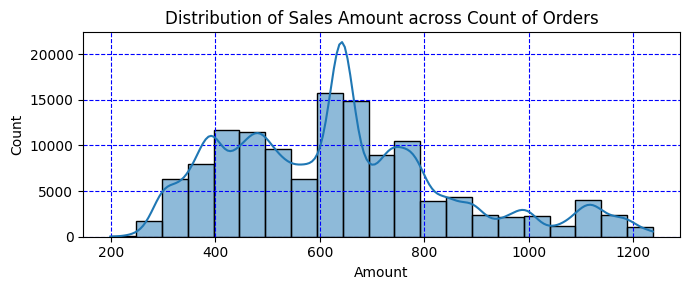

In [6]:
RangeIntQ = SlsDfNew['Amount'].quantile(0.75) - SlsDfNew['Amount'].quantile(0.25)
UB = SlsDfNew['Amount'].quantile(0.75) + 1.5*RangeIntQ
LB = SlsDfNew['Amount'].quantile(0.25) - 1.5*RangeIntQ

ValMdn = SlsDfNew['Amount'].median()
SlsDfNew['Amount'] = SlsDfNew['Amount'].apply(lambda x: ValMdn if x > UB  or x < LB else x)
SlsDfNew['Amount'] = SlsDfNew['Amount'].apply(lambda x: ValMdn if x == 0 else x)

fig, my_ax = slspl.subplots(figsize=(7,3))

sestk.histplot(data = SlsDfNew['Amount'], ax=my_ax, binwidth=50, kde=True)
slspl.grid(linestyle='--',color='b')
slspl.title("Distribution of Sales Amount across Count of Orders")
slspl.tight_layout()

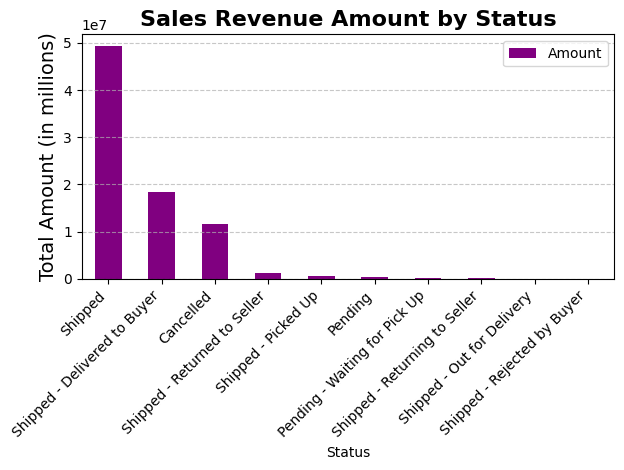

,Amount
Status,
Shipped,4.932226e+07
Shipped - Delivered to Buyer,1.832535e+07
Cancelled,1.159243e+07
Shipped - Returned to Seller,1.243692e+06
Shipped - Picked Up,6.500300e+05
Pending,4.198621e+05
Pending - Waiting for Pick Up,1.915550e+05
Shipped - Returning to Seller,1.019760e+05
Shipped - Out for Delivery,2.392700e+04


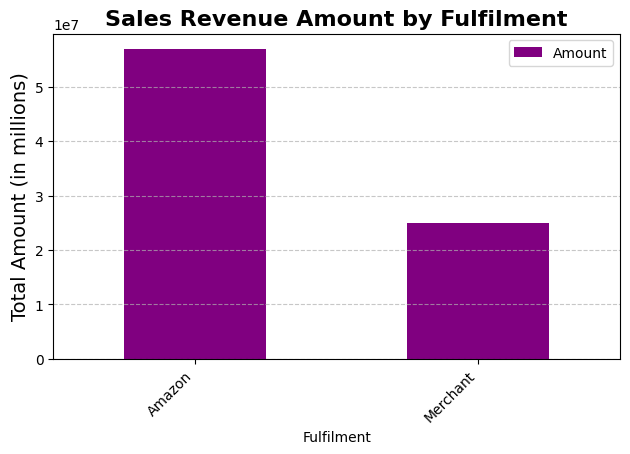

,Amount
Fulfilment,
Amazon,5.694300e+07
Merchant,2.494497e+07


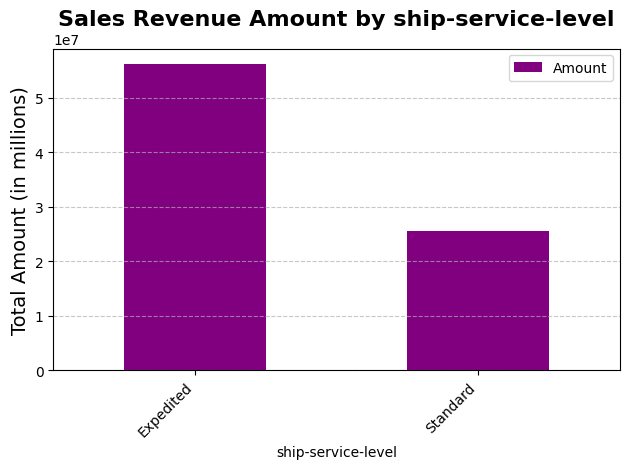

,Amount
ship-service-level,
Expedited,5.625559e+07
Standard,2.563238e+07


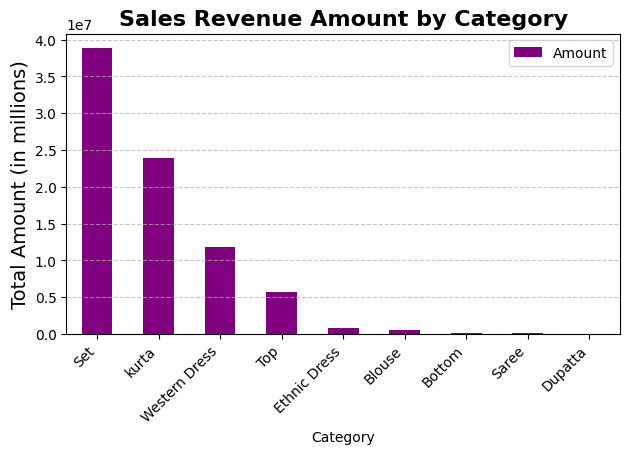

,Amount
Category,
Set,3.887499e+07
kurta,2.385903e+07
Western Dress,1.177063e+07
Top,5.746831e+06
Ethnic Dress,8.375007e+05
Blouse,5.009318e+05
Bottom,1.712592e+05
Saree,1.258848e+05
Dupatta,9.150000e+02


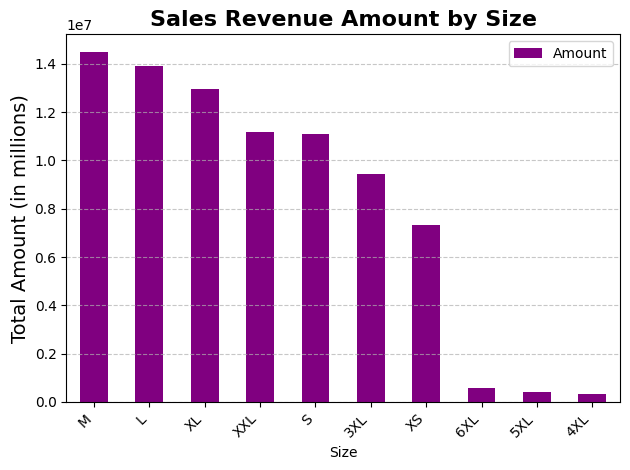

,Amount
Size,
M,1.449761e+07
L,1.390995e+07
XL,1.296513e+07
XXL,1.115897e+07
S,1.108872e+07
3XL,9.422034e+06
XS,7.324980e+06
6XL,5.614839e+05
5XL,4.178051e+05


In [7]:
fetssls=['Status','Fulfilment','ship-service-level','Category','Size']
for f in range(len(fetssls)):
    SlsTops=SlsDfNew.groupby(fetssls[f])['Amount'].sum().to_frame().sort_values(by=['Amount'],ascending=False).head(10)
    SlsTops.plot(kind='bar',color='#800080')
    slspl.title('Sales Revenue Amount by {}'.format(fetssls[f]), fontsize=16, weight='bold')
    slspl.ylabel('Total Amount (in millions)', fontsize=14)
    slspl.grid(True, axis='y', linestyle='--', alpha=0.7)
    slspl.xticks(rotation=45, ha="right")
    slspl.legend()
    slspl.tight_layout()
    slspl.show()
    display(HTML(SlsTops.to_html()))

FEATURE ENCODING

In [8]:
def DataEnc(sls):
    sls1=sls.copy()
    print("Feature Types Before Encoding")
    print(sls1.info())
    obsls=sls1.dtypes[sls1.dtypes=='object'].index.tolist()
    numsls=sls1.dtypes[sls1.dtypes!='object'].index.tolist()
    sls_objdf=sls1[obsls]
    sls_numdf=sls1[numsls]
    cols = sls_objdf.columns.tolist()
    sls_objdf[cols] = sls_objdf[cols].apply(preprocessing.LabelEncoder().fit_transform)
    sls1=pandas.concat([sls_numdf,sls_objdf],axis=1)
    if "Unnamed: 22" in sls1.columns:
        sls1=sls1.drop("Unnamed: 22",axis=1)
    print("Feature Types After Encoding")
    print(sls1.info())
    return sls1
SlsDfNew_encoded=DataEnc(SlsDfNew)
SlsDfNew_encoded.head()

Feature Types Before Encoding
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Year                128975 non-null  object        
 2   Days                128975 non-null  int64         
 3   Month(Num)          128975 non-null  int64         
 4   Months              128975 non-null  object        
 5   Order ID            128975 non-null  object        
 6   Date                128975 non-null  datetime64[ns]
 7   Status              128975 non-null  object        
 8   Fulfilment          128975 non-null  object        
 9   Sales Channel       128975 non-null  object        
 10  ship-service-level  128975 non-null  object        
 11  Style               128975 non-null  object        
 12  SKU                 128975 non-null  object        
 13 

,index,Days,Month(Num),Date,Qty,Amount,ship-postal-code,B2B,Year,Months,...,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by
0,0,30,4,2022-04-30,0,647.62,400081.0,False,0,0,...,5,7,5563,1,0,4795,28,0,5766,0
1,1,30,4,2022-04-30,1,406.00,560085.0,False,0,0,...,8,0,5277,1,0,776,23,0,2051,0
2,2,30,4,2022-04-30,1,329.00,410210.0,True,0,0,...,8,8,675,1,0,5353,28,0,5766,0
3,3,30,4,2022-04-30,0,753.33,605008.0,False,0,0,...,7,5,4638,1,0,6140,43,0,5766,0
4,4,30,4,2022-04-30,1,574.00,600073.0,False,0,0,...,6,0,4351,1,0,1466,56,0,5766,0


OUTLIER DETECTION

In [9]:
def OutVarSales(sls,v1):
    arrsls=numpy.array(sls.iloc[:,:-1])
    slspca = decomposition.PCA(n_components=2)
    slspca.fit(arrsls)
    explval=slspca.explained_variance_ratio_
    valm=max(explval.tolist())
    print(explval)
    cmp_slspca=["Comp-{}".format(i+1) for i in range(len(explval.tolist()))]
    slspl.figure(figsize=(5,3))
    valml="%.3f" % valm
    slspl.title("PCA Variance (Max: {})".format(max(explval.tolist())),fontsize=16)
    slspl.bar(cmp_slspca,explval.tolist(),width=0.5,color=v1)
    slspl.plot(explval.tolist(),"--yD")
    slspl.xlabel("Components",fontsize=14)
    slspl.ylabel("PCA Variance",fontsize=14)
    slspl.grid()
    slspl.show()
    return explval
def DataSalScl(sls):
    SCLMM = preprocessing.MinMaxScaler()
    slsscl=SCLMM.fit_transform(sls)
    return slsscl

[0.93359003 0.03530939]


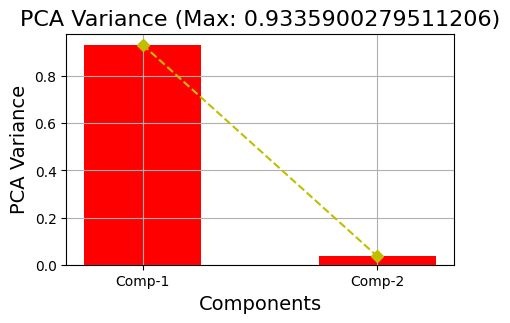

[0.30483793 0.13466289]


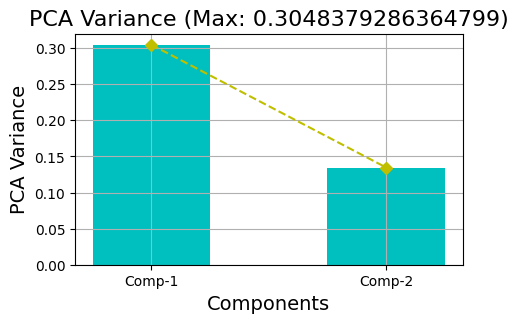

,index,Days,Month(Num),Qty,ship-postal-code,B2B,Year,Months,Order ID,Status,...,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Amount
0,0.000000,0.966667,0.0,0.000000,0.329675,0.0,0.0,0.0,0.585727,0.000000,...,0.7,0.773821,0.5,0.0,0.535515,0.411765,0.0,0.996543,0.0,647.620000
1,0.000008,0.966667,0.0,0.066667,0.511519,0.0,0.0,0.0,0.113103,0.416667,...,0.0,0.734038,0.5,0.0,0.086665,0.338235,0.0,0.354476,0.0,406.000000
2,0.000016,0.966667,0.0,0.066667,0.341187,1.0,0.0,0.0,0.376326,0.250000,...,0.8,0.093893,0.5,0.0,0.597833,0.411765,0.0,0.996543,0.0,329.000000
3,0.000023,0.966667,0.0,0.000000,0.562574,0.0,0.0,0.0,0.362877,0.000000,...,0.5,0.645152,0.5,0.0,0.685727,0.632353,0.0,0.996543,0.0,753.330000
4,0.000031,0.966667,0.0,0.066667,0.556965,0.0,0.0,0.0,0.748474,0.250000,...,0.0,0.605230,0.5,0.0,0.163726,0.823529,0.0,0.996543,0.0,574.000000
5,0.000039,0.966667,0.0,0.066667,0.103536,0.0,0.0,0.0,0.385630,0.250000,...,0.8,0.408958,0.5,0.0,0.279540,0.867647,0.0,0.996543,0.0,824.000000
6,0.000047,0.966667,0.0,0.066667,0.056865,0.0,0.0,0.0,0.938701,0.250000,...,0.5,0.233551,0.5,0.0,0.158030,0.147059,0.0,0.996543,0.0,653.000000
7,0.000054,0.966667,0.0,0.066667,0.443269,0.0,0.0,0.0,0.706871,0.416667,...,0.7,0.106969,0.5,0.0,0.324548,0.838235,0.0,0.372624,0.0,399.000000
8,0.000062,0.966667,0.0,0.000000,0.443242,0.0,0.0,0.0,0.800635,0.000000,...,0.0,0.262623,0.0,0.0,0.324548,0.838235,0.0,0.996543,0.0,648.561465
9,0.000070,0.966667,0.0,0.066667,0.556929,0.0,0.0,0.0,0.176828,0.250000,...,1.0,0.202532,0.5,0.0,0.189413,0.823529,0.0,0.996543,0.0,363.000000


In [10]:
vramnt=[]
vramnt.append(OutVarSales(SlsDfNew_encoded.drop(['Date','Amount'],axis=1),"r"))

FlagVar=[]
for vr in vramnt:
    for v in vr:
        if v>0.8:
            FlagVar.append(True)
if len(FlagVar)==1 and True in FlagVar:
    NrmSls=DataSalScl(SlsDfNew_encoded.drop(['Date','Amount'],axis=1))
NrmSls=pandas.DataFrame(NrmSls,columns=SlsDfNew_encoded.drop(['Date','Amount'],axis=1).columns.tolist())
NrmSls['Amount']=SlsDfNew_encoded['Amount'].tolist()
OutVarSales(NrmSls.drop('Amount',axis=1),"c")
NrmSls.head(10)

FEATURE SELECTION

In [11]:
def Func1(sls,nmst):
    secl="plasma"
    plst=len(sls)
    ttl_text="Correlation for {}".format(nmst)
    '''grpstk.figure(figsize=(14,8))
    grpstk.title(ttl_text,fontsize=25,color="b")
    sestk.heatmap(sls.corr(),fmt="0.2f",cmap=secl,annot=True).
    grpstk.show()'''
    corralldata=pandas.DataFrame(sls.corr()['Amount'])
    corralldata=corralldata.fillna(corralldata.mean())
    feats=corralldata.index.tolist()
    corralldata['Features']=feats
    corralldata.columns=["Coeff","Features"]
    corralldata=corralldata.reset_index(drop=True)
    slscorr=corralldata[(corralldata['Coeff']>0.01)|(corralldata['Coeff']>-0.01)].reset_index(drop=True)
    print("Selected Features Using Correlation: \n",*slscorr.Features.tolist(),sep="\n")
    print("---------------------------------------------------")
    print("     Total Features Selected Using Correlation: {}".format(len(slscorr.Features.tolist())))
    print("---------------------------------------------------")
    return slscorr.Features.tolist()
CorrSel=Func1(NrmSls, "Amazon Sales")

Selected Features Using Correlation: 

index
Days
Month(Num)
Qty
B2B
Year
Months
Order ID
Status
Fulfilment
Sales Channel 
ship-service-level
Style
SKU
ASIN
Courier Status
currency
ship-city
ship-state
ship-country
fulfilled-by
Amount
---------------------------------------------------
     Total Features Selected Using Correlation: 22
---------------------------------------------------


In [12]:
pred_sls=NrmSls.drop(['Amount'],axis=1)
target_sls=NrmSls['Amount']
pred_sls1=pred_sls
MdRecurr=feature_selection.RFE(estimator=linear_model.LinearRegression(), verbose=1,
                               n_features_to_select=int(len(pred_sls.columns)*0.9),step=0.3)
MdRecurr.fit(pred_sls, target_sls)
print(MdRecurr.ranking_)
MdRecurr.feature_names_in_    #[MdRecurr.support_==True]
rankdf=pandas.DataFrame({"Features":MdRecurr.feature_names_in_,"Rank":MdRecurr.ranking_})
rankdf1=rankdf[rankdf['Rank']==1]
print("Selected Features Using RFE: \n",*rankdf1.Features,sep="\n")
print("--------------------------------------------------------------")
print("---------------------------------------------------")
print("     Total Features Selected Using RFE: {}".format(len(rankdf1.Features)))
print("---------------------------------------------------")
RFESel=rankdf1.Features.tolist()

Fitting estimator with 25 features.
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2]
Selected Features Using RFE: 

index
Days
Month(Num)
Qty
ship-postal-code
B2B
Year
Months
Order ID
Status
Fulfilment
Sales Channel 
ship-service-level
Style
SKU
Category
Size
ASIN
Courier Status
ship-city
ship-state
promotion-ids
--------------------------------------------------------------
---------------------------------------------------
     Total Features Selected Using RFE: 22
---------------------------------------------------


In [13]:
Features_Sales=[]
for ff in RFESel:
    if ff in CorrSel:
        Features_Sales.append(ff)

print("Selected Features Using Hybrid Approach (RFE+Correlation): {}".format(len(Features_Sales)))


Selected Features Using Hybrid Approach (RFE+Correlation): 18


In [14]:
NrmSls1=utils.resample(NrmSls,replace = True, n_samples = int(len(NrmSls)*1.5), random_state = 10).reset_index(drop=True)
SlsPred=NrmSls1[Features_Sales]
SlsPred

,index,Days,Month(Num),Qty,B2B,Year,Months,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,ASIN,Courier Status,ship-city,ship-state
0,0.645161,0.100000,0.0,0.066667,0.0,0.0,1.000000,0.276041,0.416667,1.0,0.0,1.0,0.514535,0.498471,0.461678,0.5,0.611012,0.867647
1,0.818746,0.533333,0.0,0.066667,0.0,0.0,0.333333,0.097776,0.250000,0.0,0.0,0.0,0.885901,0.858632,0.392544,0.5,0.609113,0.720588
2,0.734528,0.833333,0.0,0.066667,1.0,0.0,0.333333,0.897788,0.250000,0.0,0.0,0.0,0.696221,0.714901,0.417722,0.5,0.086665,0.338235
3,0.391521,0.966667,0.0,0.066667,0.0,0.0,1.000000,0.163503,0.250000,0.0,0.0,0.0,0.710756,0.732694,0.479204,0.5,0.086665,0.338235
4,0.725363,0.866667,0.0,0.000000,0.0,0.0,0.333333,0.244415,0.000000,1.0,0.0,1.0,0.223837,0.192522,0.448741,0.5,0.163726,0.823529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193457,0.412502,0.900000,0.0,0.066667,0.0,0.0,1.000000,0.638021,0.250000,0.0,0.0,0.0,0.941860,0.928691,0.886493,0.5,0.094483,0.264706
193458,0.185999,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.857548,0.000000,0.0,0.0,0.0,0.082122,0.050459,0.206844,0.0,0.584208,0.411765
193459,0.776296,0.666667,0.0,0.066667,0.0,0.0,0.333333,0.120181,0.250000,0.0,0.0,0.0,0.951308,0.940228,0.889275,0.5,0.739669,0.117647
193460,0.045311,0.833333,0.0,0.066667,0.0,0.0,0.000000,0.994617,0.250000,0.0,0.0,0.0,0.967297,0.961218,0.819029,0.5,0.530936,0.397059


In [15]:
SlsAmount=NrmSls1['Amount']
SlsAmount

,Amount
0,329.000000
1,773.000000
2,754.000000
3,537.000000
4,648.561465
...,...
193457,967.000000
193458,648.561465
193459,751.000000
193460,597.000000


Data Segmentation


In [16]:
def SegmentData(prd,tr):
    TrainSlsX,TestSlsX,TrainSlsY,TestSlsY=model_selection.train_test_split(prd,tr, test_size=0.25, random_state=10)
    return TrainSlsX,TestSlsX,TrainSlsY,TestSlsY

TrainSlsX,TestSlsX,TrainSlsY,TestSlsY=SegmentData(SlsPred,SlsAmount)

Function for Sales Prediction

In [17]:
def SalesPredFunc(rgmd, XSLTR, XSLTS, YSLTR, YSLTS, mdl_pres_sls):
    mdl_pres_sls=rgmd
    mdl_pres_sls.fit(XSLTR, YSLTR)
    prdCov=mdl_pres_sls.predict(XSLTS)
    prdCov_tr=mdl_pres_sls.predict(XSLTR)
    mse=metrics.mean_squared_error(YSLTS,prdCov,squared=True)
    r2nf=round(metrics.r2_score(YSLTS,prdCov),4)*100
    r2nftr=round(metrics.r2_score(YSLTR,prdCov_tr),4)*100
    mapenf=metrics.mean_absolute_percentage_error(YSLTS,prdCov)
    return r2nf,r2nftr,mse,mapenf

## Assigning Models with Default Settings

In [18]:
ModelSales=[
    tree.DecisionTreeRegressor(),
    linear_model.LinearRegression(),
    svm.LinearSVR(),
    ensemble.RandomForestRegressor(min_weight_fraction_leaf=0.001)

]
ModelNmSales=[
   "Decision Tree",
    "Linear Regression",
    "Support Vector Regression",
    "Random Forest"
]


## Sales Prediction with Models with Default Settings

In [19]:
DataSalesPred=[[],[],[],[],[]]
for i in range(len(ModelSales)):
    Strt_T = datetime.datetime.now()
    print("Executing {}".format(ModelNmSales[i]))
    PrdCv=SalesPredFunc(ModelSales[i], TrainSlsX, TestSlsX, TrainSlsY, TestSlsY, ModelNmSales[i])
    DataSalesPred[0].append(PrdCv[0])
    DataSalesPred[1].append(PrdCv[1])
    DataSalesPred[2].append(PrdCv[2])
    DataSalesPred[3].append(PrdCv[3])
    EndT = datetime.datetime.now()
    DfTime = EndT-Strt_T
    TimeSec=DfTime.total_seconds()
    DataSalesPred[4].append(round(TimeSec,3))
    print("Elasped Time: {} Seconds".format(round(TimeSec,3)))
    print("______________________________________")

Executing Decision Tree
Elasped Time: 1.486 Seconds
______________________________________
Executing Linear Regression
Elasped Time: 0.214 Seconds
______________________________________
Executing Support Vector Regression
Elasped Time: 0.397 Seconds
______________________________________
Executing Random Forest
Elasped Time: 74.621 Seconds
______________________________________


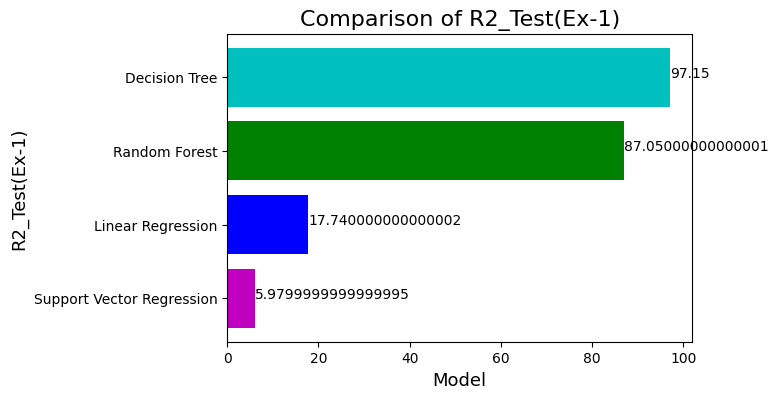

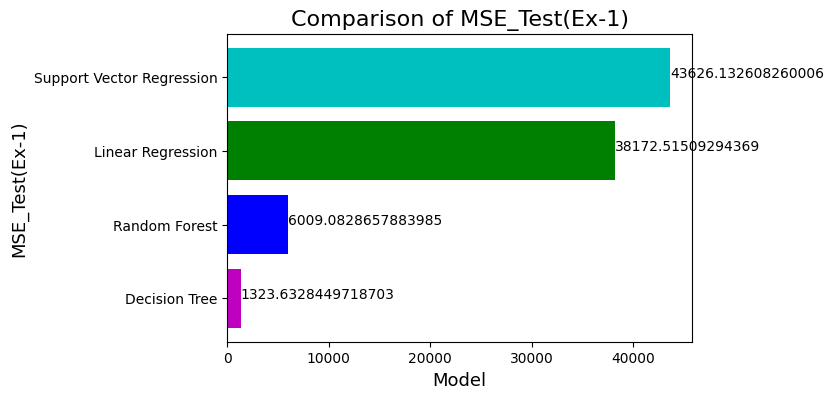

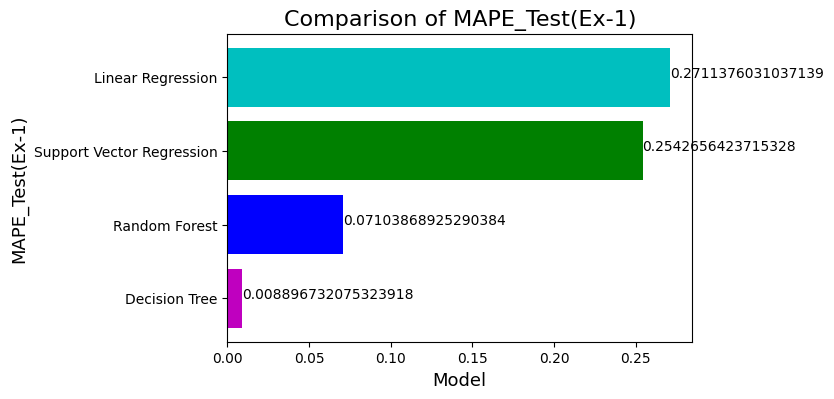

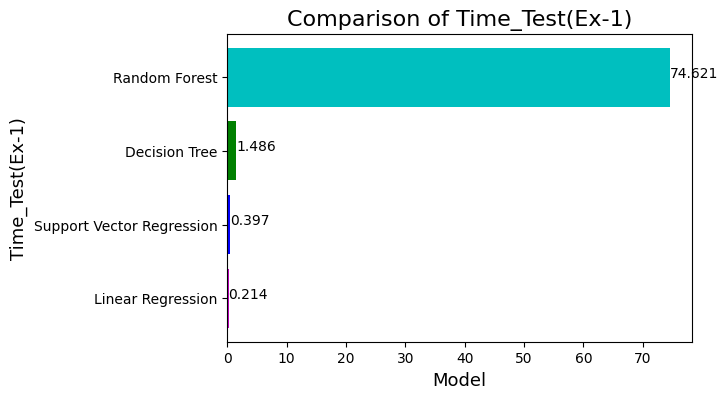

,Model,R2_Train(Ex-1),R2_Test(Ex-1),MSE_Test(Ex-1),MAPE_Test(Ex-1),Time_Test(Ex-1)
0,Decision Tree,100.00,97.15,1323.632845,0.008897,1.486
1,Random Forest,87.66,87.05,6009.082866,0.071039,74.621
2,Linear Regression,17.86,17.74,38172.515093,0.271138,0.214
3,Support Vector Regression,6.13,5.98,43626.132608,0.254266,0.397


In [20]:
PredSalesDF=pandas.DataFrame({
    "Model":ModelNmSales,
    "R2_Train(Ex-1)":DataSalesPred[1],
    "R2_Test(Ex-1)":DataSalesPred[0],
    "MSE_Test(Ex-1)":DataSalesPred[2],
    "MAPE_Test(Ex-1)":DataSalesPred[3],
    "Time_Test(Ex-1)":DataSalesPred[4]
})
PredSalesDF

clnf_all_lst=PredSalesDF.columns.tolist()[2:]
for i in clnf_all_lst:
    PredSalesDF=PredSalesDF.sort_values(by=i,ascending=True)
    slspl.figure(figsize=(6,4))
    slspl.title("Comparison of {}".format(i),fontsize=16)
    slspl.barh(PredSalesDF['Model'],PredSalesDF[i],color=["m","b","g","c"])
    slspl.xlabel("Model",fontsize=13)
    slspl.ylabel("{}".format(i),fontsize=13)
    for gid, vlgl in enumerate(PredSalesDF[i]):
        slspl.text(vlgl, gid, str(vlgl))
    slspl.show()
PredSalesDF=PredSalesDF.sort_values(by='R2_Test(Ex-1)',ascending=False).reset_index(drop=True)
PredSalesDF.to_csv("SalesPredictionEx1.csv")
PredSalesDF

## Model Tuning

In [21]:
ModelSales1=[
    tree.DecisionTreeRegressor(),
    linear_model.LinearRegression(),
    svm.LinearSVR(),
    ensemble.RandomForestRegressor(),

]
TunedModelSales=ModelSales1.copy()
HypTunes=[
    [{"max_depth":[50,60,70],"splitter":["best", "random"]}],
    [{"fit_intercept":[False,True]}],
    [{'tol': [0.01,0.001,0.0001,0.00001],'C':[0.2,0.4,0.6,0.8,1.0],"max_iter":[500,1000,1500]}],
    [{"n_estimators":[50,100],"max_depth":[50,60,70]}],
    [{'solver':['lbfgs','adam'],"alpha":[0.001,0.0001,0.00001],'tol': [0.001,0.0001,0.00001]}]
]
params_tuned, time_tuned= [], []
rgmdls=[
    'DTR.sav',
    'LR.sav',
    'SVR.sav',
    'RFR.sav'
]
dirfiles=os.listdir(os.getcwd())
if 'DTR.sav' in dirfiles and 'LR.sav' in dirfiles and 'SVR.sav' in dirfiles and 'RFR.sav' in dirfiles:
    print("-----------------------------------------------------")
    print("   Tuned Models are Loading Now ...\n   Loading Model Files")
    print("-----------------------------------------------------")
    rg1=pickle.load(open(rgmdls[0], 'rb'))
    rg2=pickle.load(open(rgmdls[1], 'rb'))
    rg3=pickle.load(open(rgmdls[2], 'rb'))
    rg4=pickle.load(open(rgmdls[3], 'rb'))
    rg5=pickle.load(open(rgmdls[4], 'rb'))
    TunedModelSales=[rg1,rg2,rg3,rg4,rg5]
    print(*TunedModelSales, sep="\n")
else:
    for c in range(len(TunedModelSales)):
        print("____________________________________________________")
        print("Tuning {}".format(ModelNmSales[c]))
        print("____________________________________________________")
        t1 = datetime.datetime.now()
        SlsGrdSrch = model_selection.GridSearchCV(TunedModelSales[c], HypTunes[c], cv = 5, scoring='r2')
        SlsGrdSrch.fit(TrainSlsX, TrainSlsY)
        TunedModelSales[c]=SlsGrdSrch.best_estimator_
        t2 = datetime.datetime.now()
        delta = t2 - t1
        ElapsedTime=delta.total_seconds()
        print("Time Taken for Tuning '{}': {} Seconds".format(ModelNmSales[c],ElapsedTime))
        print("____________________________________________________")
        print("{} Tuning Complete".format(ModelNmSales[c]))
        print("____________________________________________________")
        params_tuned.append(SlsGrdSrch.best_estimator_)
        time_tuned.append(ElapsedTime)
    for hm in range(len(TunedModelSales)):
        pickle.dump(TunedModelSales[hm], open(rgmdls[hm], 'wb'))
    TuningData=pandas.DataFrame({"Classifier":ModelNmSales,"Tuned_Parameters":params_tuned,"Tuning_Time(Sec)":time_tuned})
    #display(HTML(TuningData.to_html()))

____________________________________________________
Tuning Decision Tree
____________________________________________________
Time Taken for Tuning 'Decision Tree': 22.974196 Seconds
____________________________________________________
Decision Tree Tuning Complete
____________________________________________________
____________________________________________________
Tuning Linear Regression
____________________________________________________
Time Taken for Tuning 'Linear Regression': 2.029813 Seconds
____________________________________________________
Linear Regression Tuning Complete
____________________________________________________
____________________________________________________
Tuning Support Vector Regression
____________________________________________________
Time Taken for Tuning 'Support Vector Regression': 84.342671 Seconds
____________________________________________________
Support Vector Regression Tuning Complete
______________________________________________

In [22]:
HybSt=ensemble.StackingRegressor(estimators=[
              ('Model-1', TunedModelSales[0]),
              ('Model-2',TunedModelSales[3])],
              final_estimator=TunedModelSales[3])
HybVt=ensemble.VotingRegressor(estimators=[
              ('Model-1', TunedModelSales[0]),
              ('Model-2',TunedModelSales[3])])


In [23]:
HybSt

StackingRegressor(estimators=[('Model-1', DecisionTreeRegressor(max_depth=50)),
                              ('Model-2', RandomForestRegressor(max_depth=70))],
                  final_estimator=RandomForestRegressor(max_depth=70))

In [24]:
HybVt

VotingRegressor(estimators=[('Model-1', DecisionTreeRegressor(max_depth=50)),
                            ('Model-2', RandomForestRegressor(max_depth=70))])

In [25]:
ModelSalesAll=ModelSales.copy()
HybAll=[HybSt, HybVt]
HybNmAll=["Stacking Hybrid","Voting Hybrid"]
if len(ModelSalesAll)==5 and len(ModelNmSales)==5:
    ModelSalesAll.extend(HybAll)
    ModelNmSales.extend(HybNmAll)
else:
    ModelSalesAll=ModelSalesAll[:5]
    ModelNmSales=ModelNmSales[:5]
    ModelSalesAll.extend(HybAll)
    ModelNmSales.extend(HybNmAll)
print(*ModelSalesAll, sep="\n")
print("\n")
print(*ModelNmSales, sep="\n")

DecisionTreeRegressor()
LinearRegression()
LinearSVR()
RandomForestRegressor(min_weight_fraction_leaf=0.001)
StackingRegressor(estimators=[('Model-1', DecisionTreeRegressor(max_depth=50)),
                              ('Model-2', RandomForestRegressor(max_depth=70))],
                  final_estimator=RandomForestRegressor(max_depth=70))
VotingRegressor(estimators=[('Model-1', DecisionTreeRegressor(max_depth=50)),
                            ('Model-2', RandomForestRegressor(max_depth=70))])


Decision Tree
Linear Regression
Support Vector Regression
Random Forest
Stacking Hybrid
Voting Hybrid


In [28]:
DataSalesPredEx2=[[],[],[],[],[]]
for i in range(len(ModelSalesAll)):
    Strt_T = datetime.datetime.now()
    print("Executing {}".format(ModelNmSales[i]))
    PrdCv=SalesPredFunc(ModelSalesAll[i], TrainSlsX, TestSlsX, TrainSlsY, TestSlsY, ModelNmSales[i])
    DataSalesPredEx2[0].append(PrdCv[0])
    DataSalesPredEx2[1].append(PrdCv[1])
    DataSalesPredEx2[2].append(PrdCv[2])
    DataSalesPredEx2[3].append(PrdCv[3])
    EndT = datetime.datetime.now()
    DfTime = EndT-Strt_T
    TimeSec=DfTime.total_seconds()
    DataSalesPredEx2[4].append(round(TimeSec,3))
    print("Elasped Time: {} Seconds".format(round(TimeSec,3)))
    print("______________________________________")

Executing Decision Tree
Elasped Time: 1.46 Seconds
______________________________________
Executing Linear Regression
Elasped Time: 0.235 Seconds
______________________________________
Executing Support Vector Regression
Elasped Time: 0.2 Seconds
______________________________________
Executing Random Forest
Elasped Time: 74.281 Seconds
______________________________________
Executing Stacking Hybrid
Elasped Time: 528.208 Seconds
______________________________________
Executing Voting Hybrid
Elasped Time: 103.495 Seconds
______________________________________


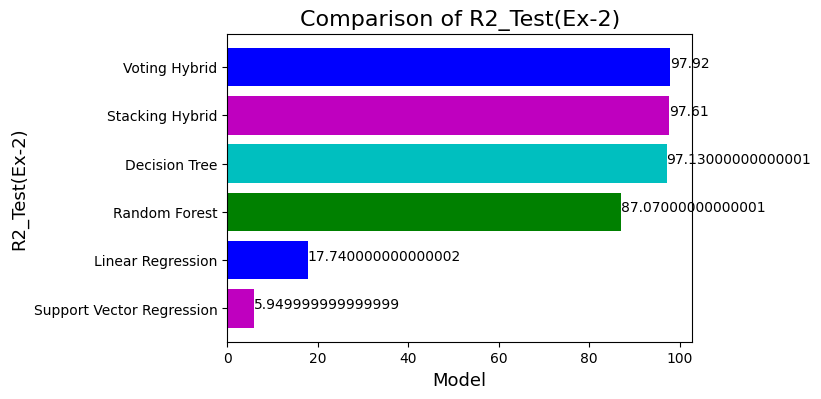

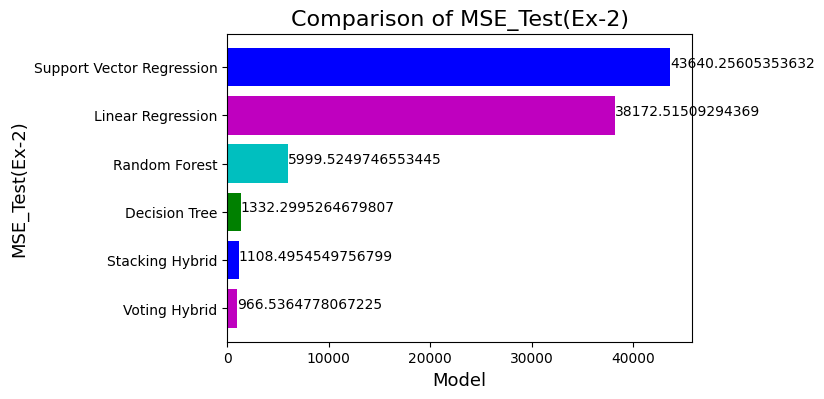

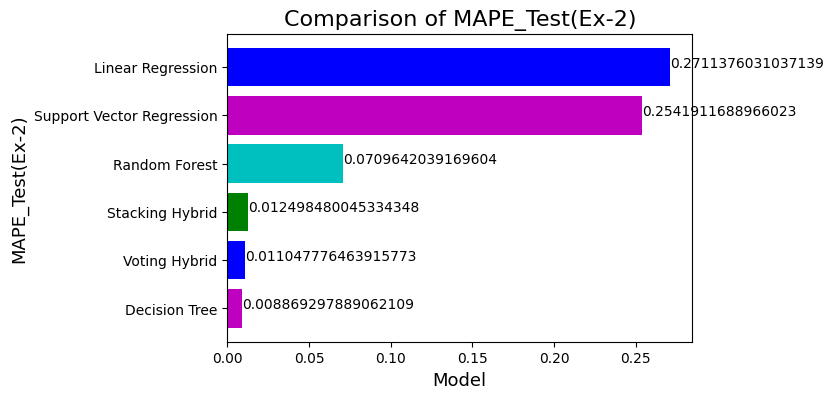

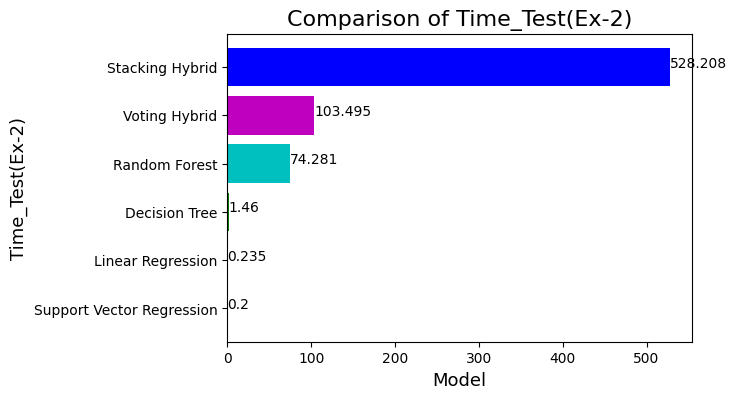

,Model,R2_Train(Ex-2),R2_Test(Ex-2),MSE_Test(Ex-2),MAPE_Test(Ex-2),Time_Test(Ex-2)
0,Voting Hybrid,99.93,97.92,966.536478,0.011048,103.495
1,Stacking Hybrid,99.54,97.61,1108.495455,0.012498,528.208
2,Decision Tree,100.00,97.13,1332.299526,0.008869,1.460
3,Random Forest,87.70,87.07,5999.524975,0.070964,74.281
4,Linear Regression,17.86,17.74,38172.515093,0.271138,0.235
5,Support Vector Regression,6.10,5.95,43640.256054,0.254191,0.200


In [29]:
PredSalesDFEx2=pandas.DataFrame({
    "Model":ModelNmSales,
    "R2_Train(Ex-2)":DataSalesPredEx2[1],
    "R2_Test(Ex-2)":DataSalesPredEx2[0],
    "MSE_Test(Ex-2)":DataSalesPredEx2[2],
    "MAPE_Test(Ex-2)":DataSalesPredEx2[3],
    "Time_Test(Ex-2)":DataSalesPredEx2[4]
})

clnf_all_lst=PredSalesDFEx2.columns.tolist()[2:]
for i in clnf_all_lst:
    PredSalesDFEx2=PredSalesDFEx2.sort_values(by=i,ascending=True)
    slspl.figure(figsize=(6,4))
    slspl.title("Comparison of {}".format(i),fontsize=16)
    slspl.barh(PredSalesDFEx2['Model'],PredSalesDFEx2[i],color=["m","b","g","c"])
    slspl.xlabel("Model",fontsize=13)
    slspl.ylabel("{}".format(i),fontsize=13)
    for gid, vlgl in enumerate(PredSalesDFEx2[i]):
        slspl.text(vlgl, gid, str(vlgl))
    slspl.show()
PredSalesDFEx2=PredSalesDFEx2.sort_values(by='R2_Test(Ex-2)',ascending=False).reset_index(drop=True)
PredSalesDFEx2.to_csv("SalesPredictionEx2.csv")
PredSalesDFEx2